In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import draw, filters
from dipy.align.imwarp import SymmetricDiffeomorphicRegistration
from dipy.align.metrics import SSDMetric
from dipy.viz import regtools
import skimage.external.tifffile as skext

In [2]:
def show_images(img_ref, img_warp, fig_name):
    fig, axarr = plt.subplots(ncols=2, figsize=(12, 5))
    axarr[0].set_title('warped image & reference contour')
    axarr[0].imshow(img_warp)
    axarr[0].contour(img_ref, colors='r')
    ssd = np.sum((img_warp - img_ref) ** 2)
    axarr[1].set_title('difference, SSD=%.02f' % ssd)
    im = axarr[1].imshow(img_warp - img_ref)
    plt.colorbar(im)
    fig.tight_layout()
    fig.savefig(fig_name + '.png')


In [6]:
img_ref=skext.imread('D:/Pictures/Celia/H2B/NewANTS/Try2/Fish3_Sub2.tif')
img_ref.shape

(20, 688, 1144)

In [7]:
sdr = SymmetricDiffeomorphicRegistration(metric=SSDMetric(img_ref.ndim),
                                         step_length=3,
                                         level_iters=[500, 250,100,50],
                                         inv_iter=100,
                                         ss_sigma_factor=0.1,
                                         opt_tol=1.e-6)

In [10]:
img_in=skext.imread('D:/Pictures/Celia/H2B/NewANTS/Try2/C1_fish3_flip_crop_Substack1-21.tif')
img_in.shape

(21, 950, 1450)

Creating scale space from the moving image. Levels: 4. Sigma factor: 0.100000.
Creating scale space from the static image. Levels: 4. Sigma factor: 0.100000.
Optimizing level 3
Optimizing level 2
Optimizing level 1
Optimizing level 0


TypeError: Invalid dimensions for image data

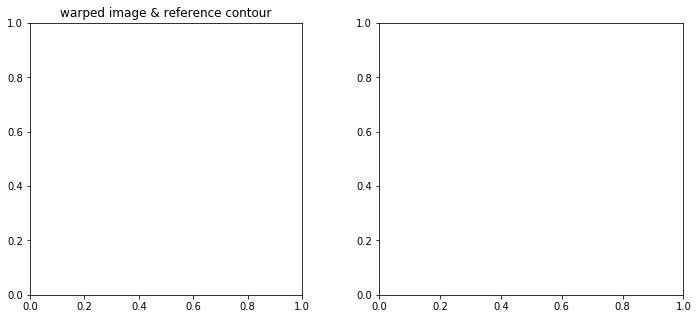

In [11]:
mapping = sdr.optimize(img_ref.astype(float), img_in.astype(float))
img_warp = mapping.transform(img_in, 'linear')
show_images(img_ref, img_warp, 'output-1')
regtools.plot_2d_diffeomorphic_map(mapping, 5, 'map-1.png')

TypeError: No matching signature found

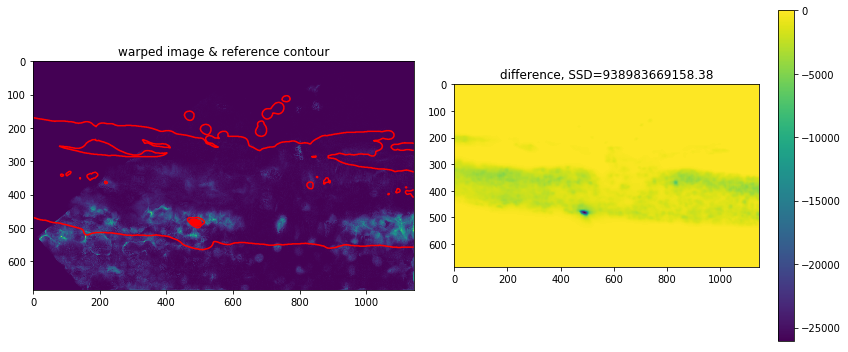

In [12]:
show_images(img_ref.mean(axis=0), img_warp.mean(axis=0), 'output-1')
regtools.plot_2d_diffeomorphic_map(mapping, 5, 'map-1.png')

In [14]:
skext.tifffile.imsave('D:/temp/test1.tif',img_ref)

In [15]:
skext.tifffile.imsave('D:/temp/test1_warp.tif',img_warp)